In [1]:
import pandas as pd #读取、处理表格的包
import numpy as np #处理数组的包
from sklearn.metrics import confusion_matrix 
import sklearn.metrics as skm
import torch
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:\\Users\\82511\\Desktop\\future\\project\\archive\\mushrooms.csv") #读取文件-绝对路径
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
#将字符串转换成数值
from sklearn.preprocessing import LabelEncoder   
labelencoder = LabelEncoder()

for i in data.columns:
    data[i] = labelencoder.fit_transform(data[i])

In [5]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [2]:
# 划分特征列和标签列
X = data.iloc[:,1:23]
y = data.iloc[:,0]

# 将数据分为训练集、验证集和测试集
from sklearn.model_selection import train_test_split
X_tv,X_test,y_tv,y_test = train_test_split(X,y,test_size=0.2,random_state=35)
X_train,X_valid,y_train,y_valid = train_test_split(X_tv,y_tv,test_size=0.2,random_state=35)

In [3]:
# 将数据格式转换成张量
# training set
X_train = torch.tensor(X_train.values,dtype = torch.float32)
y_train = torch.tensor(y_train.values,dtype = torch.float32)

# Validation set
X_valid = torch.tensor(X_valid.values,dtype = torch.float32)
y_valid = torch.tensor(y_valid.values,dtype = torch.float32)

# Test set
X_test = torch.tensor(X_test.values,dtype = torch.float32)
y_test = torch.tensor(y_test.values,dtype = torch.float32)

# set parameters
torch.manual_seed(23)
lr = 0.005  # 0.001,0.002,0.003,0.004,0.006
input_features = 22
output_features = 1
epochs = 100

def metrics(y_test, y_pred):
    accuracy = skm.accuracy_score(y_test,y_pred)
    print(accuracy)


# Model design
class MLP(nn.Module):
    def __init__(self, input_features, output_features):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_features, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, output_features)
        
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = torch.sigmoid(out)
        return out
    


# train model and identify the best model accroding to the highest validation set f1-score
def train_validate(model,X_train,y_train,X_valid,y_valid):
    train_loss = []
    train_f1_scores= []
    val_loss = []
    val_f1_scores = []
    
    val_accuracy = []
    best_val_f1 = 0.0
    best_model_params = None
 
    # train training set
    model.train()
    for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = model(X_train).flatten() # 正向传播
            loss = criterion(outputs,y_train) #计算损失
            loss.backward() #反向传播，计算每个参数的梯度
            optimizer.step()# 优化参数（梯度下降）
            train_loss.append(loss.item())
            train_f1 = skm.f1_score(y_train.numpy(), outputs.detach().numpy()>=0.5)
            train_f1_scores.append(train_f1)
             
            # optimize parameters according to validation set    
            model.eval()
            with torch.no_grad():
                val_outputs =  model(X_valid).flatten()
                val_loss_value = criterion(val_outputs, y_valid)
                val_loss.append(val_loss_value.item())
                val_accuracy_value = skm.accuracy_score(y_valid.numpy(),val_outputs.detach().numpy()>=0.5)
                val_accuracy.append(val_accuracy_value)
                val_f1 = skm.f1_score(y_valid.numpy(), val_outputs.detach().numpy()>=0.5)
                val_f1_scores.append(val_f1)

                if val_f1 > best_val_f1:
                    best_val_f1 = val_f1
                    best_model_params = model.state_dict()

    torch.save(best_model_params, 'best_model.pth')

    plt.figure(figsize=(10, 5))
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    plt.figure(figsize=(10, 5))
    plt.plot(train_f1_scores, label='Training F1-score')
    plt.plot(val_f1_scores, label='Validation F1-score')
    plt.xlabel("Epochs")
    plt.ylabel("F1-score")
    plt.legend()
    plt.show()
    
    print("validation accuracy:")
    metrics(y_valid.numpy(), val_outputs.detach().numpy()>=0.5)
   
 

# test 
def test(model, X_test,y_test):
    with torch.no_grad():
        test_outputs = model(X_test).flatten()
        print("test accuracy:")
        metrics(y_test.numpy(), test_outputs.detach().numpy()>=0.5)







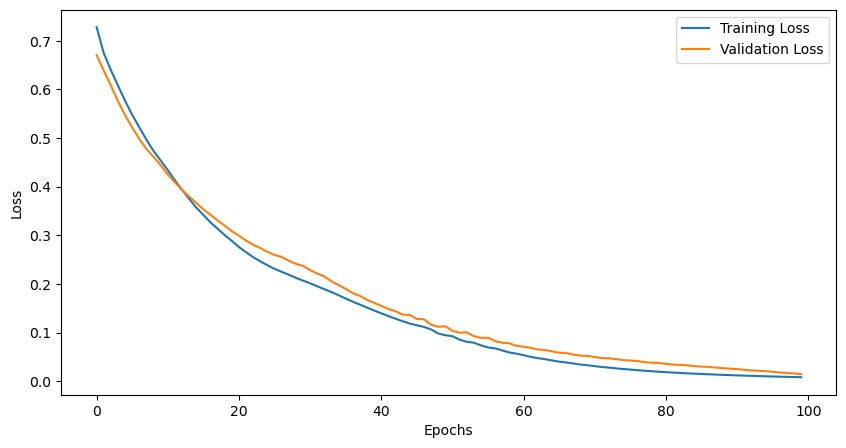

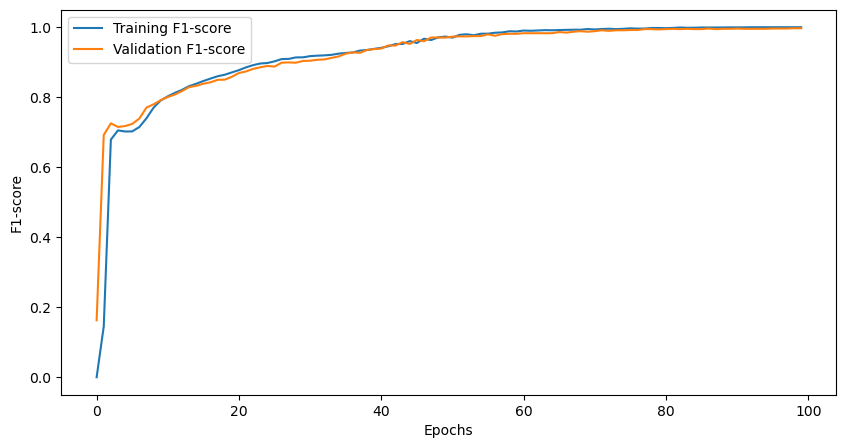

validation accuracy:
0.9961538461538462
test accuracy:
0.9975384615384615


In [4]:
model = MLP(input_features,output_features)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(),lr=lr)

train_validate(model,X_train,y_train,X_valid,y_valid)

# metrics on test set
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
test(model,X_test,y_test)
